# Import libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE, ADASYN
from functions import functions as f
# import model
from sklearn.tree import DecisionTreeClassifier 

# Import data

In [2]:
df = pd.read_csv('../data/crashes_cleaned_ohe.csv')

In [3]:
df.head()

,posted_speed_limit,num_units,sex,age,weather_condition_blowing snow,weather_condition_clear,weather_condition_cloudy/overcast,weather_condition_fog/smoke/haze,weather_condition_freezing rain/drizzle,weather_condition_rain,...,crash_month_4,crash_month_5,crash_month_6,crash_month_7,crash_month_8,crash_month_9,crash_month_10,crash_month_11,crash_month_12,serious_accident
0,35,2,1,44.0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,25,2,1,71.0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,15,2,1,60.0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,30,2,1,38.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,30,2,1,52.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


# Train-Test Split

In [4]:
X = df.drop(['serious_accident'], axis=1)
y = df.serious_accident

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=200)

In [5]:
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

## Balance the imbalaced data

In [6]:
balance = SMOTE()
X_train_scaled_balanced, y_train_balanced = balance.fit_sample(X_train_scaled, y_train)

# Run Model

In [7]:
dtree = DecisionTreeClassifier(random_state=10, criterion="entropy")  
dtree.fit(X_train_scaled_balanced, y_train_balanced)

DecisionTreeClassifier(criterion='entropy', random_state=10)

# Predict

In [8]:
predictions_from_X_train = dtree.predict(X_train_scaled_balanced)
predictions_from_X_test = dtree.predict(X_test_scaled)

## Variable Tracker

- X_train &rarr; X_train_scaled &rarr; **X_train_scaled_balanced**
    - used to create **predictions_from_X_train** which is to be compared to **y_train_balanced**
- X_test &rarr; **X_test_scaled**
    - used to create **predictions_from_X_test** which is to be compared to **y_test**
- y_train &rarr; **y_train_balanced**
- **y_test**

# Scoring

## Train Scoring

Accuracy: 100.0%
Precision: 100.0%
Recall: 99.9%
F1: 100.0%
Conufusion Matrix: 
[[43760     0]
 [   37 43723]]




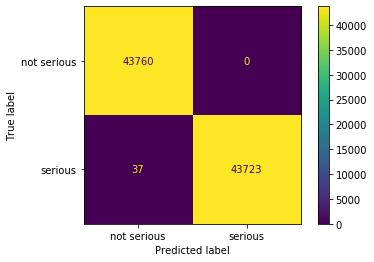

In [9]:
f.scoring(predictions_from_X_train, y_train_balanced, dtree, X_train_scaled_balanced)

## Test Scoring

Accuracy: 96.0%
Precision: 3.7%
Recall: 4.1%
F1: 3.9%
Conufusion Matrix: 
[[10692   234]
 [  209     9]]




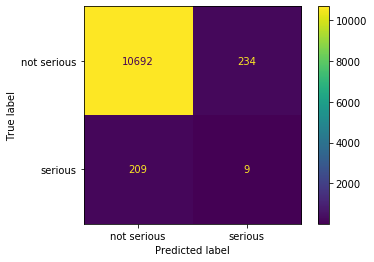

In [10]:
f.scoring(predictions_from_X_test, y_test, dtree, X_test_scaled)

In [11]:
# def plot_feature_importances(model):
#     n_features = X_train.shape[1]
#     plt.figure(figsize=(8,8))
#     plt.barh(range(n_features), model.feature_importances_, align='center') 
#     plt.yticks(np.arange(n_features), X_train.columns.values) 
#     plt.xlabel('Feature importance')
#     plt.ylabel('Feature')

# plot_feature_importances(dtree)

In [12]:
import operator
features = {}
cols = X_train.columns.values
for num in range(len(X_train.columns.values)):
    features[cols[num]] = round(dtree.feature_importances_[num] * 100, 2)
features = dict(sorted(features.items(), key=operator.itemgetter(1),reverse=True))
features = list(features.items())
features[0:15]

[('sex', 22.6),
 ('num_units', 12.6),
 ('posted_speed_limit', 9.32),
 ('crash_day_of_week_7', 4.82),
 ('age', 3.75),
 ('crash_day_of_week_5', 3.7),
 ('lighting_condition_darkness, lighted road', 3.64),
 ('crash_day_of_week_6', 2.98),
 ('crash_month_10', 2.84),
 ('crash_day_of_week_4', 2.68),
 ('crash_month_8', 2.62),
 ('roadway_surface_cond_dry', 2.17),
 ('crash_month_7', 1.91),
 ('crash_month_2', 1.64),
 ('crash_day_of_week_3', 1.63)]

## Add Scores to Scoring Dataframe

In [13]:
f.add_scores_to_scoring_df("Decision Trees", y_test, predictions_from_X_test, y_train_balanced, predictions_from_X_train)